In [1]:
import datajoint as dj
from microns_phase3 import nda, utils


Connecting root@database:3306


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
cell_id = pd.read_pickle("data/clean_functional_neurons.pkl")

In [4]:
cell_id

,pt_root_id,session,scan_idx,unit_id,cortex_layer,brain_area
0,864691136136642173,4,7,665,L1,RL
1,864691136208993724,4,7,740,L1,V1
2,864691135683934135,4,7,782,L1,V1
3,864691135334528233,4,7,855,L1,V1
4,864691136309730650,4,7,921,L1,RL
...,...,...,...,...,...,...
8852,864691135502196829,9,4,7556,L2/3,V1
8853,864691135569353862,7,3,1827,L2/3,V1
8854,864691135925955086,5,6,2592,L2/3,V1
8855,864691135082076407,8,5,1859,L2/3,V1


In [5]:
nda.AreaMembership()

session Session ID,scan_idx Scan ID,unit_id unique per scan,brain_area Visual area membership of unit
4,7,1,LM
4,7,2,LM
4,7,3,LM
4,7,4,LM
4,7,5,LM
4,7,6,LM
4,7,7,LM
4,7,8,LM
4,7,9,LM
4,7,10,LM


In [45]:
#Loading activity data
#Generating list of dictionary with keys for all our cells so that we can subset nda.Activity
act_keys = []
pairs = [(4, 7), (5, 3), (5, 6),(5, 7),(6, 2),(6, 4),(6, 6),(6, 7),(7, 3),(7, 4),(7,5),(8,5)]

for ses, sid, uid in zip(cell_id['session'], cell_id['scan_idx'], cell_id['unit_id']):
    if (ses, sid) in pairs:
        act_keys.append({'session':ses, 'scan_idx':sid,'unit_id':uid})

#Subset nda.Activity
red_activity = nda.Activity&act_keys

#Load it as a DataFrame
activity_df = red_activity.fetch(format = 'frame')
activity_df = activity_df.reset_index()

/usr/local/lib/python3.9/site-packages/datajoint/connection.py:219: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


In [25]:
activity_list = (activity_df.loc[activity_df[['trace']).to_list()
# activity_list = [act[:40000] for act in activity_list]

In [27]:
activity_df

,session,scan_idx,unit_id,trace
0,4,7,648,"[1.1941045e-08, 1.1054097e-08, 1.0557152e-08, ..."
1,4,7,662,"[1.9826677e-08, 1.0863233e-08, 9.350616e-09, 7..."
2,4,7,664,"[3.1129141e-09, 3.2344656e-09, 3.4878285e-09, ..."
3,4,7,665,"[2.1552595e-09, 1.306883e-09, 1.2151588e-09, 1..."
4,4,7,671,"[4.335371e-08, 3.2033128e-08, 3.6368494e-08, 2..."
...,...,...,...,...
8852,9,6,4872,"[9.365646e-08, 1.9001894e-07, 6.572707e-07, 7...."
8853,9,6,4929,"[3.904674e-08, 3.7245695e-08, 3.666212e-08, 3...."
8854,9,6,4964,"[2.7367837e-09, 1.4091663e-09, 7.72324e-10, 4...."
8855,9,6,4984,"[4.437899e-09, 2.7483662e-09, 1.886624e-09, 1...."


In [26]:
{act.size for act in activity_list}

{40000, 50000, 57000}

In [18]:
activity_arr = np.stack(activity_list, axis=0)

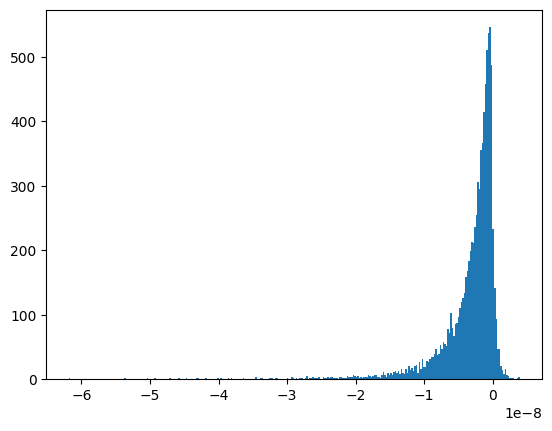

In [44]:
plt.hist(activity_arr.min(axis=1), bins=300);

In [52]:
treadmill_df = (nda.Treadmill & act_keys).fetch(format='frame')
treadmill_df = treadmill_df.reset_index()

In [54]:
treadmill_arr = np.stack(treadmill_df['treadmill_velocity'].to_list(), axis=0)

In [60]:
(treadmill_arr).shape

(12, 40000)

In [61]:
pupil_df = (nda.ManualPupil & act_keys).fetch(format='frame')
pupil_df = pupil_df.reset_index()

In [63]:
pupil_df

,session,scan_idx,pupil_min_r,pupil_maj_r,pupil_x,pupil_y
0,4,7,"[nan, nan, nan, nan, nan, nan, nan, nan, 74.14...","[nan, nan, nan, nan, nan, nan, nan, nan, 86.76...","[nan, nan, nan, nan, nan, nan, nan, nan, 1346....","[nan, nan, nan, nan, nan, nan, nan, nan, 814.8..."
1,5,3,"[nan, nan, nan, nan, nan, nan, nan, nan, 56.05...","[nan, nan, nan, nan, nan, nan, nan, nan, 74.23...","[nan, nan, nan, nan, nan, nan, nan, nan, 1348....","[nan, nan, nan, nan, nan, nan, nan, nan, 750.0..."
2,5,6,"[nan, nan, nan, nan, nan, nan, nan, nan, 40.66...","[nan, nan, nan, nan, nan, nan, nan, nan, 82.24...","[nan, nan, nan, nan, nan, nan, nan, nan, 1353....","[nan, nan, nan, nan, nan, nan, nan, nan, 755.5..."
3,5,7,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,6,2,"[nan, nan, nan, nan, nan, nan, nan, nan, 27.90...","[nan, nan, nan, nan, nan, nan, nan, nan, 61.61...","[nan, nan, nan, nan, nan, nan, nan, nan, 1349....","[nan, nan, nan, nan, nan, nan, nan, nan, 763.7..."
5,6,4,"[nan, nan, nan, nan, nan, nan, nan, nan, 78.67...","[nan, nan, nan, nan, nan, nan, nan, nan, 85.99...","[nan, nan, nan, nan, nan, nan, nan, nan, 1359....","[nan, nan, nan, nan, nan, nan, nan, nan, 743.5..."
6,6,6,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7,6,7,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
8,7,3,"[nan, nan, nan, nan, nan, nan, nan, 39.3340072...","[nan, nan, nan, nan, nan, nan, nan, 57.7080620...","[nan, nan, nan, nan, nan, nan, nan, 1070.90987...","[nan, nan, nan, nan, nan, nan, nan, 584.776968..."
9,7,4,"[nan, nan, nan, nan, nan, nan, nan, nan, 89.15...","[nan, nan, nan, nan, nan, nan, nan, nan, 96.88...","[nan, nan, nan, nan, nan, nan, nan, nan, 1064....","[nan, nan, nan, nan, nan, nan, nan, nan, 575.1..."


In [78]:
pupil_arr_maj = np.stack(pupil_df['pupil_maj_r'].to_list(), axis=0)
pupil_arr_min = np.stack(pupil_df['pupil_min_r'].to_list(), axis=0)

In [79]:
np.isnan(pupil_arr_maj).sum(axis=1) / pupil_arr_maj.shape[1]

array([0.303225, 0.747   , 0.02655 , 0.100025, 0.024875, 0.03295 ,
       0.0409  , 0.138575, 0.046725, 0.009675, 0.017025, 0.015   ])

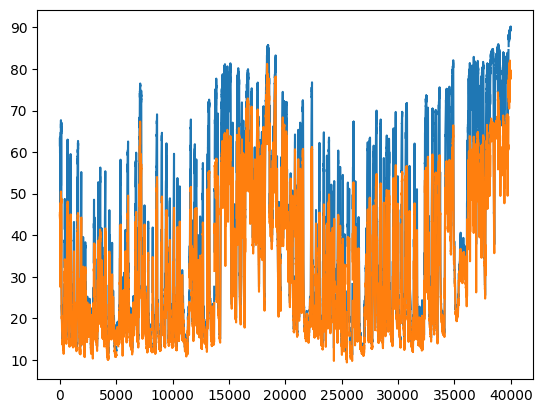

In [93]:
idx = 4
plt.plot(pupil_arr_maj[idx,:]);
# plt.plot(pupil_arr_min[idx,:]);
plt.plot((pupil_arr_min[idx,:] + pupil_arr_maj[idx,:])/2);